<a href="https://colab.research.google.com/github/Risaarista/Python-pertemuan-10/blob/main/Pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [30]:
ls

3scene/    daun1.jpg  nnmodel_scene/   Untitled1.ipynb  Untitled3.ipynb
dataseet/  foto/      Untitled0.ipynb  Untitled2.ipynb


In [31]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [32]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataseet")
data = []
labels = []

[INFO] loading images...


In [33]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [34]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [35]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [36]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [37]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 64, 64, 3)
(149, 64, 64, 3)


In [38]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [39]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [40]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 74ms/step - loss: 1.6128 - accuracy: 0.2140 - val_loss: 1.5696 - val_accuracy: 0.4161
Epoch 2/25
14/14 [==============================] - 1s 66ms/step - loss: 1.5341 - accuracy: 0.3626 - val_loss: 1.4947 - val_accuracy: 0.3960
Epoch 3/25
14/14 [==============================] - 1s 65ms/step - loss: 1.3988 - accuracy: 0.4505 - val_loss: 1.3887 - val_accuracy: 0.4430
Epoch 4/25
14/14 [==============================] - 1s 66ms/step - loss: 1.2367 - accuracy: 0.5045 - val_loss: 1.2400 - val_accuracy: 0.5235
Epoch 5/25
14/14 [==============================] - 1s 67ms/step - loss: 1.1019 - accuracy: 0.5721 - val_loss: 1.2796 - val_accuracy: 0.5168
Epoch 6/25
14/14 [==============================] - 1s 66ms/step - loss: 1.1162 - accuracy: 0.5653 - val_loss: 1.1278 - val_accuracy: 0.5570
Epoch 7/25
14/14 [==============================] - 1s 66ms/step - loss: 0.9335 - accuracy: 0.6622 - val_loss: 1.0165 - val_accuracy: 0.6040
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


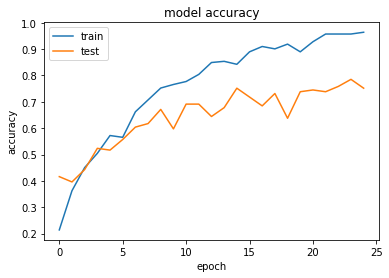

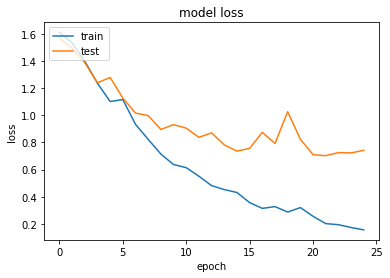

In [42]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.76      0.51      0.61        37
      GMB_02       0.61      0.82      0.70        33
      GMB_04       0.86      0.73      0.79        26
      GMB_05       0.72      0.95      0.82        22
      GMB_06       0.90      0.84      0.87        31

    accuracy                           0.75       149
   macro avg       0.77      0.77      0.76       149
weighted avg       0.77      0.75      0.75       149



In [44]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [45]:
import cv2
import matplotlib.pyplot as plt
image1='daun1.jpg'

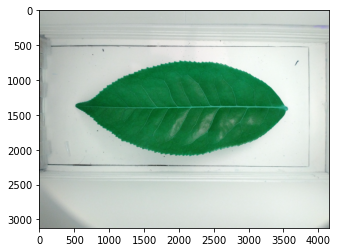

In [46]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [47]:
image_testing = Image.open('daun1.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [48]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [49]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[4.8520078e-04 9.3259716e-01 7.1863539e-04 6.6106997e-02 9.2020193e-05]]
['GMB_02']
